In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random


C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_speed = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[1])
        value_speed = float(name.split('_')[0])
        labels_dir.append(value_dir)
        labels_speed.append(value_speed)
        images.append(image)
    return images, labels_speed, labels_dir

In [3]:
#dataset = "../../Pics/Track/Datasets_Axionable/ironcar_pics"
#dataset = "../../Pics/cleaned1"
#dataset = "../../Pics/tagged2"
#dataset = "../../Pics/Track/OldDataset_balanced"
#dataset = "../../Pics/Track/Mixed"
#dataset = "../../Pics/Balanced"
dataset = "../../Pics/testTrack"
#dataset = "../../Pics/testTrack_3"

In [4]:
# load images from both train and test groups
directory = '../../' + dataset
images, labels_speed, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels: %d' % nb_images)

Loaded Images and labels: 21767


In [5]:
#Normalise images
images = np.array(images)
images /= 255

In [6]:
#convert datas to dummyvalues
labels_speed = np.array(pd.get_dummies(labels_speed))
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([1, 0], dtype=uint8),
 array([0, 0, 0, 1, 0], dtype=uint8),
 <matplotlib.image.AxesImage at 0x1bcdd4259b0>)

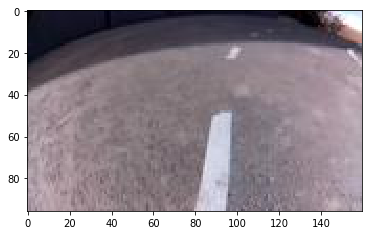

In [7]:
labels_speed[42], labels_dir[42], plt.imshow(images[42])

In [8]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [9]:
K.clear_session()
############################################################# Multitask Model  

img_in = Input(shape=(96, 160, 3), name='img_in')

x = img_in

x = Convolution2D(2, (16,16), strides=(8,8), activation='relu', padding='same')(x)
#x = Dropout(.1)(x)
x = Convolution2D(4, (16,16), strides=(8,8), activation='relu', padding='same')(x)
#x = Dropout(.1)(x)
x = Convolution2D(16, (16,16), strides=(8,8), activation='relu', padding='same')(x)
#x = Dropout(.1)(x)

flat = Flatten()(x)

x = Dense(10)(flat)
x = Activation('relu')(x)
#x = Dropout(.1)(x)
#categorical output

out_speed = Dense(2, activation='softmax')(x)
out_dir = Dense(5, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out_speed, out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 96, 160, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 12, 20, 2)    1538        img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 2, 3, 4)      2052        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 1, 1, 16)     16400       conv2d_2[0][0]                   
__________________________________________________________________________________________________
flatten_1 

In [34]:
h = model.fit(images, [labels_speed, labels_dir], batch_size=128, epochs=20, verbose=1, validation_split=0.3)

Train on 15236 samples, validate on 6531 samples
Epoch 1/20
15236/15236 [==============================] - 59s 4ms/step - loss: 0.9202 - dense_2_loss: 0.1040 - dense_3_loss: 0.8162 - dense_2_acc: 0.9627 - dense_3_acc: 0.6827 - val_loss: 1.0568 - val_dense_2_loss: 0.1388 - val_dense_3_loss: 0.9180 - val_dense_2_acc: 0.9533 - val_dense_3_acc: 0.6495
Epoch 2/20
15236/15236 [==============================] - 23s 2ms/step - loss: 0.9182 - dense_2_loss: 0.1057 - dense_3_loss: 0.8124 - dense_2_acc: 0.9610 - dense_3_acc: 0.6847 - val_loss: 1.0751 - val_dense_2_loss: 0.1437 - val_dense_3_loss: 0.9315 - val_dense_2_acc: 0.9475 - val_dense_3_acc: 0.6379
Epoch 3/20
15236/15236 [==============================] - 16s 1ms/step - loss: 0.9084 - dense_2_loss: 0.1032 - dense_3_loss: 0.8052 - dense_2_acc: 0.9613 - dense_3_acc: 0.6878 - val_loss: 1.0586 - val_dense_2_loss: 0.1401 - val_dense_3_loss: 0.9185 - val_dense_2_acc: 0.9513 - val_dense_3_acc: 0.6537
Epoch 4/20
15236/15236 [========================

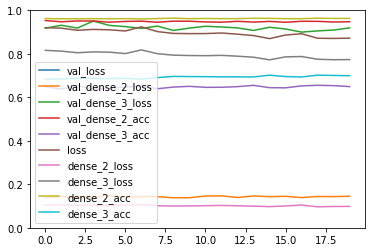

In [35]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [39]:
model.save('model_multi_testTrack.h5')

In [22]:
#######################  VALIDATION

#dataset = "../../Pics/Track/Datasets_Axionable/ironcar_pics"
#dataset = "../../Pics/cleaned1"
#dataset = "../../Pics/tagged2"
#dataset = "../../Pics/Track/OldDataset_balanced"
#dataset = "../../Pics/Track/Mixed"
#dataset = "../../Pics/Balanced"
dataset = "../../Pics/testTrack"
#dataset = "../../Pics/testTrack_3"

In [23]:
def load_photos_val(directory):
    images = []
    labels_speed = []
    labels_dir = []
    dir_list = listdir(directory)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[1])
        value_speed = float(name.split('_')[0])
        labels_dir.append(value_dir)
        labels_speed.append(value_speed)
        images.append(image)
    return images, labels_speed, labels_dir

In [24]:
# load images from both train and test groups
directory = '../../' + dataset
images_val, labels_speed_val, labels_dir_val = load_photos(directory)
nb_images = len(images_val)
print('Loaded Images and labels: %d' % nb_images)

Loaded Images and labels: 21767


In [25]:
images_val = np.array(images_val)
images_val /= 255

In [36]:
# Get predictions
all_preds = model.predict(images_val)

speed_preds = []
for elem in all_preds[0]:
    speed_preds.append(np.argmax(elem))
    
dir_preds = []
for elem in all_preds[1]:
    dir_preds.append(np.argmax(elem))

In [37]:
res = 0
for i, value in enumerate(speed_preds):
    if value != labels_speed_val[i]:
        res = res + 1
print("error_rate = " + str(res/i))

error_rate = 0.040981347055039974


In [38]:
res = 0
for i, value in enumerate(dir_preds):
    if value != labels_dir_val[i]:
        res = res + 1
print("error_rate = " + str(res/i))

error_rate = 0.3168244050353763
